In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import cv2


cimg=cv2.imread("cimg.jpg",0)
cimg.shape
cimg=np.transpose(cimg)
cimg.shape

(600, 450)

In [120]:
BW=cimg/255

In [121]:
pos=np.argwhere(BW==1)

In [122]:
pos

array([[ 52, 263],
       [ 53, 262],
       [ 53, 264],
       ...,
       [599,  41],
       [599,  43],
       [599,  44]])

In [123]:
X=pos

In [124]:
X

array([[ 52, 263],
       [ 53, 262],
       [ 53, 264],
       ...,
       [599,  41],
       [599,  43],
       [599,  44]])

In [125]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

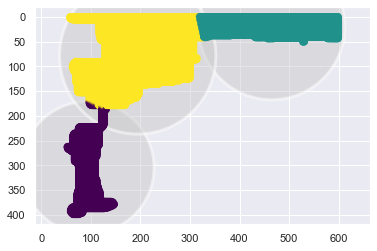

In [133]:
kmeans = KMeans(n_clusters=3, random_state=0)
fig = plt.figure()
plot_kmeans(kmeans, X)
plt.gca().invert_yaxis()

In [134]:
fig.savefig('temp.png', dpi=fig.dpi)

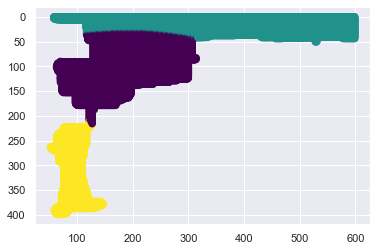

In [140]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.gca().invert_yaxis()

In [141]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.012 0.    0.988]
 [0.012 0.    0.988]
 [0.01  0.    0.99 ]
 [0.009 0.    0.991]
 [0.008 0.    0.992]]


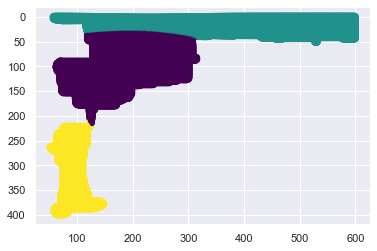

In [143]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);
plt.gca().invert_yaxis()

In [148]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

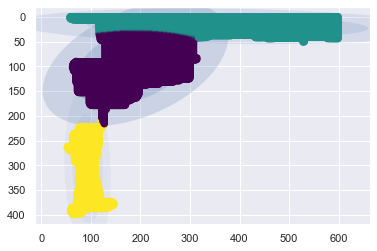

In [149]:
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, X)
plt.gca().invert_yaxis()